In [1]:
import qbos
tqb = qbos.core()  # This object has access to the core API methods for circuit simulation
tqb.qb12()         # Set up some sensible defaults

In [2]:
tqb.xasm = True    # Use XASM circuit format 
tqb.noise = True   
tqb.acc = "aer"    # Use the aer state-vector simulator with QB's embedded noise model 

In [3]:
# Option 1: a single H-gate (minimising the circuit depth)
tqb.instring = '''            
__qpu__ void QBCIRCUIT(qreg q) {
H(q[0]); // notice we initialise at |0> by default 
Measure(q[0]);
}
'''

In [4]:
# Option 2: the equivalent circuit thru optimal native gate set of QB hardware
tqb.instring = '''            
__qpu__ void QBCIRCUIT(qreg q) {
Ry(q[0],pi/2);
X(q[0]);
Measure(q[0]);
}
'''

In [5]:
tqb.sn[0].clear()
sweep = [1,100]
[tqb.sn[0].append(nn) for nn in sweep]

[None, None]

In [6]:
tqb.run()

In [7]:
print(tqb.out_raw[0][0])

{
    "1": 1
}


In [8]:
print(tqb.out_raw[0][1])

{
    "0": 55,
    "1": 45
}


Text(0, 0.5, 'Shots measured')

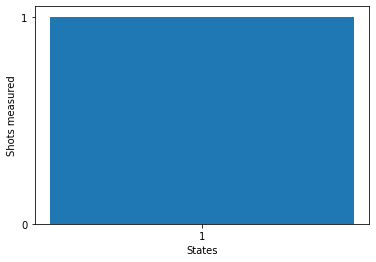

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, show, legend, ylabel
fig1 = figure()
ax1 = fig1.add_subplot(111)
xdat=[format(iix,'01b') for iix in iter(tqb.out_count[0][0])]
ydat=[tqb.out_count[0][0][iiy] for iiy in iter(tqb.out_count[0][0])]
ax1.bar(xdat,ydat)
plt.yticks(np.arange(0, 1.001, step=1))
plt.xlabel("States")
plt.ylabel("Shots measured")

In [10]:
tqb.out_total_init_maxgate_readout_time[0][0][0]

480.0

In [11]:
tqb.out_total_init_maxgate_readout_time[0][1][0]

48000.0